<a href="https://colab.research.google.com/github/ik-code-lab/week3-AI-toola-and-application/blob/main/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
## Step 1: Load and Prepare the Dataset
# Load MNIST dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Function to normalize images
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

# Prepare training dataset
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

# Prepare test dataset
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.HILP1V_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.HILP1V_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
## Step 2: Build the CNN Model
model = tf.keras.Sequential([
    # Reshape input from (28, 28) to (28, 28, 1)
    tf.keras.layers.Reshape((28, 28, 1)),

    # First convolutional block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten and dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

# Display model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## Step 3: Train the Model
history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 115ms/step - accuracy: 0.8432 - loss: 0.5054 - val_accuracy: 0.9834 - val_loss: 0.0507
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 104ms/step - accuracy: 0.9812 - loss: 0.0645 - val_accuracy: 0.9870 - val_loss: 0.0409
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.9852 - loss: 0.0472 - val_accuracy: 0.9901 - val_loss: 0.0288
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.9885 - loss: 0.0372 - val_accuracy: 0.9908 - val_loss: 0.0282
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9917 - val_loss: 0.0259
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 103ms/step - accuracy: 0.9922 - loss: 0.0236 - val_accuracy: 0.9908 - val_loss: 0.0284
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.9942 - loss: 0.0175 - val_accuracy: 0.9921 - val_loss: 0.0282
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9955 - loss: 0

In [ ]:
## Step 4: Evaluate the Model
test_loss, test_acc = model.evaluate(ds_test)
print(f'\nTest accuracy: {test_acc:.4f}')

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9909 - loss: 0.0249

Test accuracy: 0.9921


In [ ]:
## Step 5: Visualize Predictions on Sample Images
# Get a batch of test images
test_images, test_labels = next(iter(ds_test))
test_images = test_images.numpy()
test_labels = test_labels.numpy()

# Select 5 random samples
sample_indices = np.random.choice(len(test_images), 5, replace=False)
sample_images = test_images[sample_indices]
sample_labels = test_labels[sample_indices]

# Make predictions
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


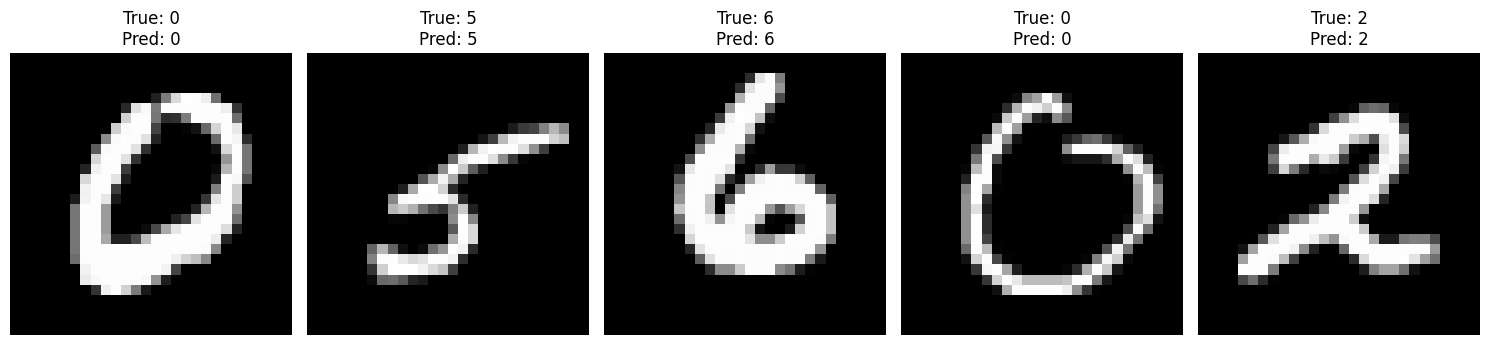

In [ ]:
# Plot the samples with predictions
plt.figure(figsize=(15, 5))
for i, (image, true_label, pred_label) in enumerate(zip(sample_images, sample_labels, predicted_labels)):
    plt.subplot(1, 5, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()
